![ ](https://www.pon-cat.com/application/files/7915/8400/2602/home-banner.jpg)

# <center> **Data Visualization and Exploratory Data Analysis** </center>

Visualization is an important part of data analysis. By presenting information visually, you facilitate the process of its perception, which makes it possible to highlight additional patterns, evaluate the ratios of quantities, and quickly communicate key aspects in the data.

Let's start with a little "memo" that should always be kept in mind when creating any graphs.

### <center> How to visualize data and make everyone hate you </center>

1. Chart **titles** are unnecessary. It is always clear from the graph what data it describes.
2. Do not label under any circumstances both **axes** of the graph. Let the others check their intuition!
3. **Units** are optional. What difference does it make if the quantity was measured, in people or in liters!
4. The smaller the **text** on the graph, the sharper the viewer's eyesight.
5. You should try to fit all the **information** that you have in the dataset in one chart. With full titles, transcripts, footnotes. The more text, the more informative!
6. Whenever possible, use as many 3D and special effects as you have. There will be less visual distortion rather than 2D.

As an example, consider the pandemic case. Let's use a dataset with promptly updated statistics on coronavirus (COVID-19), which is publicly available on Kaggle: https://www.kaggle.com/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv

The main libraries for visualization in Python that we need today are **matplotlib, seaborn, plotly**. 

> If you use Jupyter notebook type `conda install -c conda-forge` instead of `pip install`

In [ ]:
# Download required binded packages
#!pip install plotly-express #does not exist with conda
#!pip install nbformat
#!pip install plotly
#or 
#!conda install -c conda-forge plotly


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import pickle # for JSON serialization
import plotly
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

%config InlineBackend.figure_format = 'svg' #  graphs in svg look sharper

# Change the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

import warnings
warnings.filterwarnings('ignore')

We read the data and look at the number of countries in the dataset and what time period it covers.

In [2]:
data = pd.read_csv('./data/covid_19_clean.csv')

In [3]:
data.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


How many countries there are in this table?

In [4]:
data['Country/Region'].nunique()

187

In [5]:
data.shape #return the number of rows and columns

(49068, 10)

In [6]:
data.describe() #statistics of columns with numerical data

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [8]:
data.describe(include=['object']) #automatic statistics of columns with type equalled to object

,Province/State,Country/Region,Date,WHO Region
count,14664,49068,49068,49068
unique,78,187,188,6
top,Australian Capital Territory,China,2020-01-22,Europe
freq,188,6204,261,15040


__How many cases on average were confirmed per report?__: Metrics of centrality:

In [9]:
data['Confirmed'].mode()

0    0
Name: Confirmed, dtype: int64

In [10]:
data['Confirmed'].median()

168.0

In [11]:
data['Confirmed'].mean()

16884.90425531915

__What is the maximum number of confirmed cases in every country?__

* look [at](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html) to `.agg`
* `groupby` is described [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)

In [12]:
data.groupby('Country/Region')['Confirmed'].agg(max)

Country/Region
Afghanistan           36263
Albania                4880
Algeria               27973
Andorra                 907
Angola                  950
                      ...  
West Bank and Gaza    10621
Western Sahara           10
Yemen                  1691
Zambia                 4552
Zimbabwe               2704
Name: Confirmed, Length: 187, dtype: int64

In [18]:
data.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
US                       4290259
Brazil                   2442375
India                    1480073
Russia                    816680
South Africa              452529
                          ...   
Dominica                      18
Saint Kitts and Nevis         17
Greenland                     14
Holy See                      12
Western Sahara                10
Name: Confirmed, Length: 187, dtype: int64

__What is the maximum number of deaths in every country?__

* Do it yourself

* **mean()**: Compute mean of groups

* **sum()**: Compute sum of group values

* **size()**: Compute group sizes

* **count()**: Compute count of group

* **std()**: Standard deviation of groups

* **var()**: Compute variance of groups

* **sem()**: Standard error of the mean of groups

* **describe()**: Generates descriptive statistics

* **first()**: Compute first of group values

* **last()**: Compute last of group values

* **nth()** : Take nth value, or a subset if n is a list

* **min()**: Compute min of group values

* **max()**: Compute max of group values

You can see several characteristics at once (mean, median, prod, sum, std,
var) - both in DataFrame and Series:

In [19]:
data.groupby('Country/Region')['Confirmed'].agg(['mean', 'median', 'std'])

,mean,median,std
Country/Region,,,
Afghanistan,10299.946809,1407.0,13458.792417
Albania,1046.287234,695.0,1264.372255
Algeria,6275.292553,3191.5,7339.328093
Andorra,502.148936,734.5,371.460824
Angola,120.542553,25.0,214.148815
...,...,...,...
West Bank and Gaza,1241.813830,341.0,2513.959434
Western Sahara,4.792553,6.0,4.172042
Yemen,357.340426,1.0,548.353443


* useful link: https://pbpython.com/pandas-pivot-table-explained.html

In [ ]:
data.pivot_table(columns='WHO Region', index='Date', values='Confirmed', aggfunc='sum')

In [ ]:
data['Active'] > 0

In [ ]:
data[ data['WHO Region'] == 'Western Pacific']['Country/Region'].unique()

In [ ]:
data[(data['WHO Region'] == 'Western Pacific') & (data['Confirmed'] > data.Confirmed.mean())]

In [ ]:
data[(data['WHO Region'] == 'Western Pacific') & (data['Confirmed'] > data.Confirmed.mean())]['Country/Region'].unique()

In [ ]:
some_countries = ['China', 'Singapore', 'Philippines', 'Japan']

In [ ]:
data[data['Country/Region'].isin(some_countries)].head(10)

Let's make a small report:

In [20]:
data = pd.read_csv('./data/covid_19_clean.csv')

print("Number of countries: ", data['Country/Region'].nunique())
print(f"Day from {min(data['Date'])} till {max(data['Date'])}, overall {data['Date'].nunique()} days.")

data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')


display(data[data['Country/Region'] == 'Poland'].tail(10))

Number of countries:  187
Day from 2020-01-22 till 2020-07-27, overall 188 days.


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
46639,NaN,Poland,51.9194,19.1451,2020-07-18,39746,1618,29924,8204,Europe
46900,NaN,Poland,51.9194,19.1451,2020-07-19,40104,1624,30292,8188,Europe
47161,NaN,Poland,51.9194,19.1451,2020-07-20,40383,1627,30539,8217,Europe
47422,NaN,Poland,51.9194,19.1451,2020-07-21,40782,1636,30771,8375,Europe
47683,NaN,Poland,51.9194,19.1451,2020-07-22,41162,1642,31139,8381,Europe
47944,NaN,Poland,51.9194,19.1451,2020-07-23,41580,1651,31541,8388,Europe
48205,NaN,Poland,51.9194,19.1451,2020-07-24,42038,1655,31997,8386,Europe
48466,NaN,Poland,51.9194,19.1451,2020-07-25,42622,1664,32419,8539,Europe
48727,NaN,Poland,51.9194,19.1451,2020-07-26,43065,1671,32753,8641,Europe
48988,NaN,Poland,51.9194,19.1451,2020-07-27,43402,1676,32856,8870,Europe


The coronavirus pandemic is a clear example of an exponential distribution. To demonstrate this, let's build a graph of the total number of infected and dead. We will use a linear chart type (** Line Chart **), which can reflect the dynamics of one or several indicators. It is convenient to use it to see how a value changes over time.

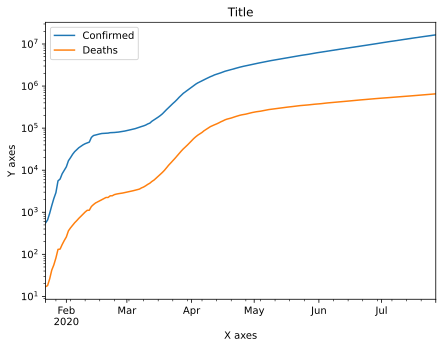

In [21]:
# Line chart

ax = data[['Confirmed', 'Deaths', 'Date']].groupby('Date').sum().plot(title='Title')
ax.set_xlabel("X axes")
ax.set_ylabel("Y axes");
ax.set_yscale('log')
 
# TODO
# Change the title and axes names

The graph above shows us general information around the world. Let's select the 10 most affected countries (based on the results of the last day from the dataset) and on one **Line Chart** show data for each of them according to the number of registered cases of the disease. This time, let's try using the **plotly** library.

In [22]:
# Preparation steps fot the table

# Extract the top 10 countries by the number of confirmed cases
df_top = data[data['Date'] == max(data.Date)]
df_top = df_top.groupby('Country/Region', as_index=False)['Confirmed'].sum()
df_top = df_top.nlargest(10, 'Confirmed')

# Extract trend across time
df_trend = data.groupby(['Date','Country/Region'], as_index=False)['Confirmed'].sum()
df_trend = df_trend.merge(df_top, on='Country/Region')
df_trend.rename(columns={'Country/Region' : 'Countries', 
                         'Confirmed_x':'Cases',
                         'Date' : 'Dates'}, 
                inplace=True)

## Observing the above code line-by-line

In [23]:
df_top = data[data['Date'] == max(data.Date)]
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 48807 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  78 non-null     object        
 1   Country/Region  261 non-null    object        
 2   Lat             261 non-null    float64       
 3   Long            261 non-null    float64       
 4   Date            261 non-null    datetime64[ns]
 5   Confirmed       261 non-null    int64         
 6   Deaths          261 non-null    int64         
 7   Recovered       261 non-null    int64         
 8   Active          261 non-null    int64         
 9   WHO Region      261 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 22.4+ KB


In [24]:
df_top = data[data['Date'] == max(data.Date)]
df_top = df_top.groupby('Country/Region', as_index=False)['Confirmed'].sum()
df_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  187 non-null    object
 1   Confirmed       187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [25]:
df_top = data[data['Date'] == max(data.Date)]
df_top.info()
df_top = df_top.groupby('Country/Region', as_index=False)['Confirmed'].sum()
df_top.info()
df_top = df_top.nlargest(10, 'Confirmed')
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 48807 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  78 non-null     object        
 1   Country/Region  261 non-null    object        
 2   Lat             261 non-null    float64       
 3   Long            261 non-null    float64       
 4   Date            261 non-null    datetime64[ns]
 5   Confirmed       261 non-null    int64         
 6   Deaths          261 non-null    int64         
 7   Recovered       261 non-null    int64         
 8   Active          261 non-null    int64         
 9   WHO Region      261 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 22.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ---

In [26]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dates        1880 non-null   datetime64[ns]
 1   Countries    1880 non-null   object        
 2   Cases        1880 non-null   int64         
 3   Confirmed_y  1880 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 58.9+ KB


__Technical implant__

Without the following magic cell, the plotly figures remain blank in my Jupyter notebook

In [27]:
import plotly.io as pio
pio.renderers.default = 'iframe'

## Explaining the lines

* We choose the entries with the most recent date
* group these entries with respect to 'Country/Region' 
* and take 10 countries in the top

In [28]:
# Plot a graph
# px stands for plotly_express
fig = px.line(data_frame = df_trend, 
        title='Increased number of cases of COVID-19',
        x='Dates', 
        y='Cases', 
        color='Countries'
)
fig.show()

Let's put a logarithm on this column. 

In [29]:
# Add a column to visualize the logarithmic
df_trend['ln(Cases)'] = np.log(df_trend['Cases'] + 1) # Add 1 for log (0) case

px.line(df_trend, 
        x='Dates', 
        y='ln(Cases)', 
        color='Countries', 
        title='COVID19 Total Cases growth for top 10 worst affected countries(Logarithmic Scale)')

What interesting conclusions can you draw from this graph?

Try to do similar graphs for the deaths and active cases.

In [ ]:
# TODO


Another popular chart is the **Pie chart**. Most often, this graph is used to visualize the relationship between parts (ratios).

In [ ]:
# Pie chart

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
labels_donut = [country for country in df_top['Country/Region']]
fig.add_trace(go.Pie(labels=labels_donut, hole=.4, hoverinfo="label+percent+name", 
                     values=[cases for cases in df_top.Confirmed], 
                     name="Ratio", ), 1, 1)
labels_pie = [country for country in df_top['Country/Region']]
fig.add_trace(go.Pie(labels=labels_pie, pull=[0, 0, 0.2, 0], 
                     values=[cases for cases in df_top.Confirmed], 
                     name="Ratio"), 1, 2)

fig.update_layout(
    title_text="Donut & Pie Chart: Distribution of COVID-19 cases among the top-10 affected countries",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text=' ', x=0.5, y=0.5, font_size=16, showarrow=False)],
    colorway=['rgb(69, 135, 24)', 'rgb(136, 204, 41)', 'rgb(204, 204, 41)', 
              'rgb(235, 210, 26)', 'rgb(209, 156, 42)', 'rgb(209, 86, 42)', 'rgb(209, 42, 42)', ])
fig.show()

In the line graphs above, we have visualized aggregate country information by the number of cases detected. Now, let's try to plot a daily trend chart by calculating the difference between the current value and the previous day's value.
For this purpose, we will use a histogram (**Histogram**). Also, let's add pointers to key events, for example, lockdown dates in Wuhan province in China, Italy and the UK.

In [ ]:
# Histogram

def add_daily_diffs(df):
    # 0 because the previous value is unknown
    df.loc[0,'Cases_daily'] = 0
    df.loc[0,'Deaths_daily'] = 0
    for i in range(1, len(df)):
        df.loc[i,'Cases_daily'] = df.loc[i,'Confirmed'] - df.loc[i - 1,'Confirmed']
        df.loc[i,'Deaths_daily'] = df.loc[i,'Deaths'] - df.loc[i - 1,'Deaths']
    return df

df_world = data.groupby('Date', as_index=False)['Deaths', 'Confirmed'].sum()
df_world = add_daily_diffs(df_world)

fig = go.Figure(data=[
    go.Bar(name='The number of cases',
           marker={'color': 'rgb(0,100,153)'},
           x=df_world.Date, 
           y=df_world.Cases_daily),
    go.Bar(name='The number of cases', x=df_world.Date, y=df_world.Deaths_daily)
])

fig.update_layout(barmode='overlay', title='Statistics on the number of Confirmed and Deaths from COVID-19 across the world',
                 annotations=[dict(x='2020-01-23', y=1797, text="Lockdown (Wuhan)", 
                                   showarrow=True, arrowhead=1, ax=-100, ay=-200),
                              dict(x='2020-03-09', y=1797, text="Lockdown (Italy)", 
                                   showarrow=True, arrowhead=1, ax=-100, ay=-200),
                              dict(x='2020-03-23', y=19000, text="Lockdown (UK)", 
                                   showarrow=True, arrowhead=1, ax=-100, ay=-200)])
fig.show()

In [ ]:
# Save 
plotly.offline.plot(fig, filename='my_beautiful_histogram.html', show_link=False)

A histogram is often mistaken for a bar chart due to its visual similarity, but these charts have different purposes. The bar graph shows how the data is distributed over a continuous interval or a specific period of time. Frequency is located along the vertical axis of the histogram, intervals or some time period along the horizontal axis.

Let's build the **Bar Chart** now. It can be vertical and horizontal, let's choose the second option.
Let's build a graph only for the top 20 countries in mortality. We will calculate this statistics as the ratio of the number of deaths to the number of confirmed cases for each country.

For some countries in the dataset, statistics are presented for each region (for example, for all US states). For such countries, we will leave only one (maximum) value. Alternatively, one could calculate the average for the regions and leave it as an indicator for the country.

In [ ]:
# Bar chart

df_mortality = data.query('(Date == "2020-07-17") & (Confirmed > 100)') 
df_mortality['mortality'] = df_mortality['Deaths'] / df_mortality['Confirmed']
df_mortality['mortality'] = df_mortality['mortality'].apply(lambda x: round(x, 3))
df_mortality.sort_values('mortality', ascending=False, inplace=True)
# Keep the maximum mortality rate for countries for which statistics are provided for each region.
df_mortality.drop_duplicates(subset=['Country/Region'], keep='first', inplace=True)

fig = px.bar(df_mortality[:20].iloc[::-1],
             x='mortality', 
             y='Country/Region',
             labels={'mortality': 'Death rate', 'Country\Region': 'Country'},
             title=f'Death rate: top-20 affected countries on 2020-07-17', 
             text='mortality', 
             height=800, 
             orientation='h') # горизонтальный
fig.show()

# TODO: раскрасить столбцы по тепловой карте (используя уровень смерности)
# Для этого добавьте аргументы color = 'mortality'

**Heat Maps** quite useful for additional visualization of correlation matrices between features. When there are a lot of features, with the help of such a graph you can more quickly assess which features are highly correlated or do not have a linear relationship.

In [ ]:
# Heat map
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='cividis'); # try another color, e.g.'RdBu'

The scatter plot helps to find the relationship between the two indicators. To do this, you can use pairplot, which will immediately display a histogram for each variable and a scatter plot for two variables (along different plot axes).

In [ ]:
# Pairplot
sns_plot = sns.pairplot(data[['Deaths', 'Confirmed']])
sns_plot.savefig('pairplot.png') # save

**Pivot table** can automatically sort and aggregate your data.

In [ ]:
# Pivot table

plt.figure(figsize=(12, 4))
df_new = df_mortality.iloc[:10]
df_new['Confirmed'] = df_new['Confirmed'].astype(np.int)
df_new['binned_fatalities'] = pd.cut(df_new['Deaths'], 3)
platform_genre_sales = df_new.pivot_table(
                        index='binned_fatalities', 
                        columns='Country/Region', 
                        values='Confirmed', 
                        aggfunc=sum).fillna(int(0)).applymap(np.int)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.7, cmap="viridis");

In [ ]:
# Geo

# file with abbreviations 
with open('./data/countries_codes.pkl', 'rb') as file:
    countries_codes = pickle.load(file)
    
df_map = data.copy()
df_map['Date'] = data['Date'].astype(str)
df_map = df_map.groupby(['Date','Country/Region'], as_index=False)['Confirmed','Deaths'].sum()
df_map['iso_alpha'] = df_map['Country/Region'].map(countries_codes)
df_map['ln(Confirmed)'] = np.log(df_map.Confirmed + 1)
df_map['ln(Deaths)'] = np.log(df_map.Deaths + 1)

px.choropleth(df_map, 
              locations="iso_alpha", 
              color="ln(Confirmed)", 
              hover_name="Country/Region",
              hover_data=["Confirmed"],
              animation_frame="Date",
              color_continuous_scale=px.colors.sequential.OrRd,
              title = 'Total Confirmed Cases growth (Logarithmic Scale)')

What important information did the new graph provide (visualization by time and geolocation)? Is it possible to answer the questions according to the schedule:
* Which country did the spread of the coronavirus start from?
* Which countries are most affected by the pandemic?
* What part of the hemisphere accounts for the majority of cases? What hypotheses can be formulated regarding the temperature and rate of spread of the virus?

What other observations can you make from the graph?

### **Recommended materials**

1. Matplotlib documentation https://matplotlib.org/3.2.1/tutorials/index.html 
2. Seaborn documentation https://seaborn.pydata.org/tutorial.html
3. Plotly https://plotly.com/python/ 
4. [Kaggle COVID19-Explained through Visualizations](https://www.kaggle.com/anshuls235/covid19-explained-through-visualizations/#data)
5. Open Data Science lecture on these topics:
https://www.youtube.com/watch?v=fwWCw_cE5aI&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX&index=2

https://www.youtube.com/watch?v=WNoQTNOME5g&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX&index=3

### **Additional libraries**:
* Bokeh
* ggplot
* geoplotlib
* pygal
